## **비지도 학습의 종류**
* 비지도 변환 (unsupervised transformation)
* 군집 (clustering)

### **비지도 변환 (unsupervised transformation)**
많이 사용되는 분야는 고차원 데이터의 특성을 줄이면서 꼭 필요한 특징을 포함한 데이터로 표현해준다.



### **군집 (Clustering)**
데이터를 비슷한 것끼리 그룹으로 묶는다.

In [2]:
pip install mglearn

     |████████████████████████████████| 542kB 2.6MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.8-py2.py3-none-any.whl size=582647 sha256=0d76b2defc3a3874162038e542bd28d6538efa76359d1a0bff017c3c68b3f8ea
  Stored in directory: /root/.cache/pip/wheels/47/b8/58/ce0c4be41f4efbfb8773eb72782164dbb758685d12ef2732f5
Successfully built mglearn


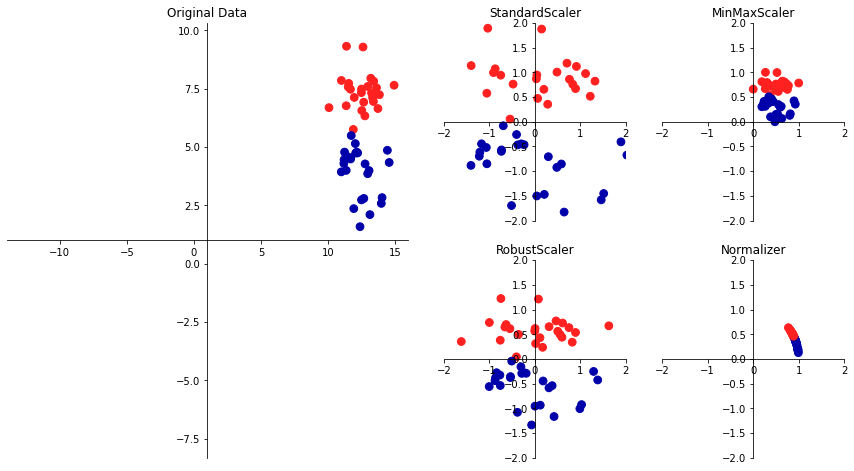

In [4]:
import mglearn
mglearn.plots.plot_scaling()

### **StandardScaler**
* 각 특성(feature)의 평균을 0, 분산을 1로 변경
* feature의 최솟값과 최댓값의 크기를 제한하지 않음

### **MinMaxScaler**
* 모든 특성이 정확하게 0과 1 사이에 위치하도록 데이터를 변경

### **RobustScaler**
* StandardScaler와 비슷
* 평균과 분산 대신 중간값(median)과 사분위값(quantile)을 사용
  * 중앙값을 선택하기 때문에 전체 데이터와 아주 동떨어진 데이터 포인트에 영향을 받지 않음

### **Normalizer**
* 유클리디안 길이가 1이 되도록 데이터 포인트를 조정
* 지름이 1인 원에 데이터 포인트를 투영

#### **데이터 변경 연습해보기 - MinMaxScaler**

In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [6]:
cancer = load_breast_cancer()
print(cancer.keys())
print(cancer.data.shape)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
(569, 30)


데이터 셋 나누기

In [8]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify = cancer.target,
                                                    random_state = 77)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


0~1 사이의 값으로 만들기
* MinMaxScaler 이용

In [0]:
# 소수점 아래 넷째자리까지만 보이게 포맷팅
import numpy as np
np.set_printoptions(formatter={'float_kind': lambda x : '{0:0.4f}'.format(x)})

In [13]:
X_train[0:3]

array([[15.1000, 16.3900, 99.5800, 674.5000, 0.1150, 0.1807, 0.1138,
        0.0853, 0.2001, 0.0647, 0.4309, 1.0680, 2.7960, 39.8400, 0.0090,
        0.0418, 0.0320, 0.0226, 0.0235, 0.0050, 16.1100, 18.3300,
        105.9000, 762.6000, 0.1386, 0.2883, 0.1960, 0.1423, 0.2590,
        0.0778],
       [9.5040, 12.4400, 60.3400, 273.9000, 0.1024, 0.0649, 0.0296,
        0.0208, 0.1815, 0.0691, 0.2773, 0.9768, 1.9090, 15.7000, 0.0096,
        0.0143, 0.0198, 0.0142, 0.0203, 0.0030, 10.2300, 15.6600,
        65.1300, 314.9000, 0.1324, 0.1148, 0.0887, 0.0623, 0.2450,
        0.0777],
       [8.5970, 18.6000, 54.0900, 221.2000, 0.1074, 0.0585, 0.0000,
        0.0000, 0.2163, 0.0736, 0.3368, 2.7770, 2.2220, 17.8100, 0.0208,
        0.0140, 0.0000, 0.0000, 0.0615, 0.0068, 8.9520, 22.4400, 56.6500,
        240.1000, 0.1347, 0.0777, 0.0000, 0.0000, 0.3142, 0.0812]])

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled[0:3]

array([[0.3628, 0.2080, 0.3675, 0.2165, 0.6774, 0.4948, 0.2666, 0.4242,
        0.4753, 0.3212, 0.1140, 0.1564, 0.0955, 0.0629, 0.2479, 0.3802,
        0.0809, 0.4277, 0.2202, 0.1413, 0.3041, 0.1684, 0.3091, 0.1680,
        0.4453, 0.2532, 0.1565, 0.4890, 0.2435, 0.1492],
       [0.0888, 0.0713, 0.0883, 0.0444, 0.5406, 0.1397, 0.0693, 0.1032,
        0.3813, 0.4169, 0.0583, 0.1363, 0.0536, 0.0163, 0.2683, 0.1159,
        0.0501, 0.2692, 0.1743, 0.0716, 0.0635, 0.0914, 0.0640, 0.0285,
        0.4043, 0.0849, 0.0708, 0.2140, 0.2103, 0.1488],
       [0.0444, 0.2844, 0.0439, 0.0218, 0.5949, 0.1199, 0.0000, 0.0000,
        0.5571, 0.5161, 0.0799, 0.5341, 0.0684, 0.0204, 0.6471, 0.1131,
        0.0000, 0.0000, 0.7539, 0.2047, 0.0112, 0.2870, 0.0130, 0.0051,
        0.4195, 0.0489, 0.0000, 0.0000, 0.3747, 0.1713]])

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


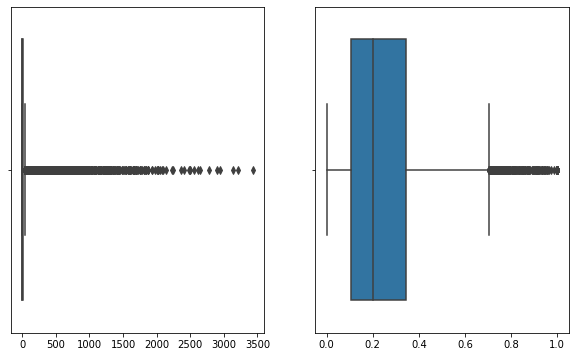

In [16]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.boxplot(X_train)

plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)

#### **데이터 변경 연습해보기 - StandardScaler**

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
# X_train_scaled = scaler.fit_transform(X_train)

print('변경 전의 값', X_train[0:2])
print('변경 후의 값', X_train_scaled[0:2])

변경 전의 값 [[15.1000 16.3900 99.5800 674.5000 0.1150 0.1807 0.1138 0.0853 0.2001
  0.0647 0.4309 1.0680 2.7960 39.8400 0.0090 0.0418 0.0320 0.0226 0.0235
  0.0050 16.1100 18.3300 105.9000 762.6000 0.1386 0.2883 0.1960 0.1423
  0.2590 0.0778]
 [9.5040 12.4400 60.3400 273.9000 0.1024 0.0649 0.0296 0.0208 0.1815
  0.0691 0.2773 0.9768 1.9090 15.7000 0.0096 0.0143 0.0198 0.0142 0.0203
  0.0030 10.2300 15.6600 65.1300 314.9000 0.1324 0.1148 0.0887 0.0623
  0.2450 0.0777]]
변경 후의 값 [[0.2925 -0.6765 0.3288 0.0709 1.3217 1.4403 0.3203 0.9472 0.6727 0.2696
  0.0709 -0.3154 -0.0568 -0.0139 0.6049 0.9194 0.0042 1.7076 0.3296
  0.4080 -0.0219 -1.2001 -0.0304 -0.2000 0.3020 0.2506 -0.3419 0.4445
  -0.4776 -0.3242]
 [-1.3259 -1.5966 -1.3142 -1.0977 0.4291 -0.7395 -0.7345 -0.7257 0.0118
  0.9047 -0.4888 -0.4801 -0.4979 -0.5806 0.7965 -0.6379 -0.3837 0.3730
  -0.0542 -0.3173 -1.2624 -1.6364 -1.2656 -1.0112 0.0284 -0.8903 -0.8560
  -0.7837 -0.7127 -0.3276]]


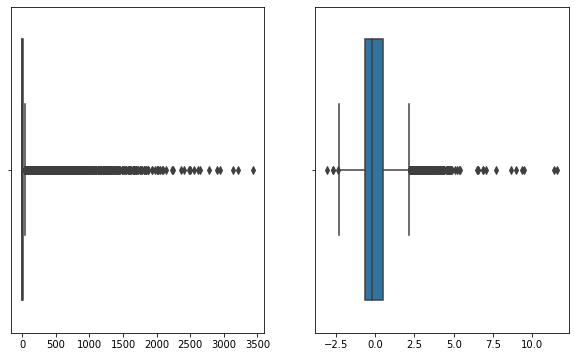

In [19]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.boxplot(X_train)

plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)

#### **데이터 변경 연습해보기 - RobustScaler**

In [0]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

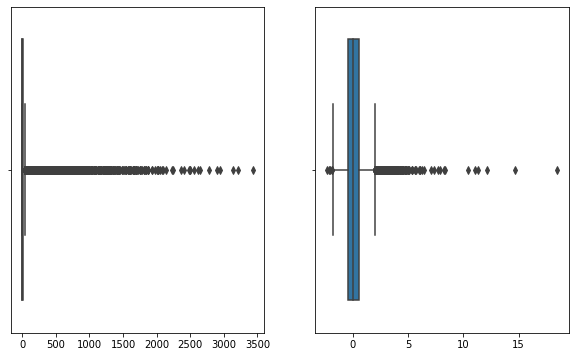

In [21]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.boxplot(X_train)

plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)

#### **데이터 변경 연습해보기 - Normalizer**

In [0]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

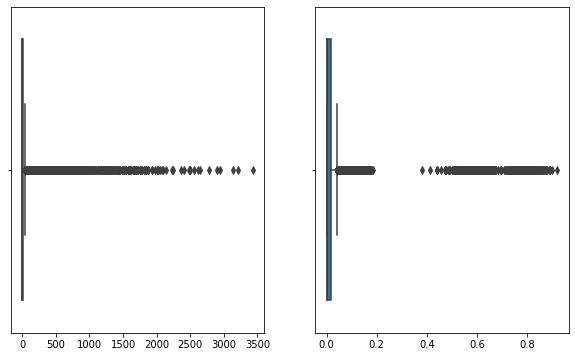

In [23]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.boxplot(X_train)

plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)